In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_clean = pd.read_csv('train.csv')
test_clean = pd.read_csv('test.csv')

In [3]:
train = train_clean.copy()
test = test_clean.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
data = pd.concat([train, test], keys=('x', 'y'))
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
  1        2          20       RL         80.0     9600   Pave   NaN      Reg   
  2        3          60       RL         68.0    11250   Pave   NaN      IR1   
  3        4          70       RL         60.0     9550   Pave   NaN      IR1   
  4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
y 1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
  1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
  1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
  1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
  1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
x 0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...            ...       ...  ...      ...    ...    ...         ...     ...   
y 1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
  1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

       MoSold YrSold  SaleType  SaleCondition  SalePrice  
x 0         2   2008        WD         Normal   208500.0  
  1         5   2007        WD         Normal   181500.0  
  2         9   2008        WD         Normal   223500.0  
  3         2   2006        WD        Abnorml   140000.0  
  4        12   2008        WD         Normal   250000.0  
...       ...    ...       ...            ...        ...  
y 1454      6   2006        WD         Normal        NaN  
  1455      4   2006        WD        Abnorml        NaN  
  1456      9   2006        WD        Abnorml        NaN  
  1457      7   2006        WD         Normal        NaN  
  1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [8]:
data.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [9]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [10]:
data.isnull().sum().sort_values(ascending=False)[:20]

SalePrice       1459
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF1         1
dtype: int64

In [11]:
num_data = data._get_numeric_data().columns.tolist()
cat_data = set(data.columns) - set(num_data)

In [12]:
cat_data

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [13]:
for col in num_data:
    data[col].fillna(data[col].mean(), inplace=True)
    
for col in cat_data:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [14]:
for col in cat_data:
    if data[col].value_counts()[0]/data[col].value_counts().sum() > 0.85:
        data = data.drop(col, axis=1)

In [15]:
cat_data = set(data.columns) - set(num_data)
for col in cat_data:
    print(data[col].value_counts()[0]/data[col].value_counts().sum())

0.5114765330592669
0.4672833162041795
0.8307639602603631
0.7307297019527236
0.35149023638232274
0.8228845495032545
0.47584789311408016
0.6368619390202124
0.7913669064748201
0.6803699897225077
0.34772182254196643
0.44809866392600206
0.7773210003425831
0.5114765330592669
0.605001712915382
0.6159643713600548
0.644056183624529
0.5039397053785543
0.15176430284343953
0.3186022610483042


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

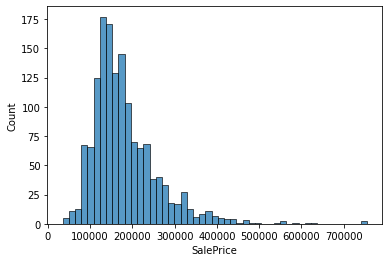

In [16]:
import seaborn as sns
sns.histplot(data=train, x="SalePrice")

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

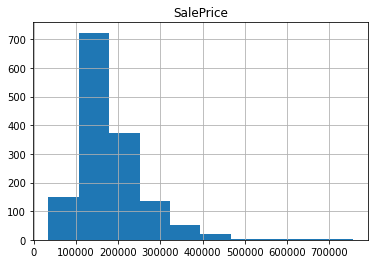

In [20]:
train.hist(column='SalePrice')

In [16]:
train['SalePrice'] = np.log1p(train['SalePrice'])
data['SalePrice'] = np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

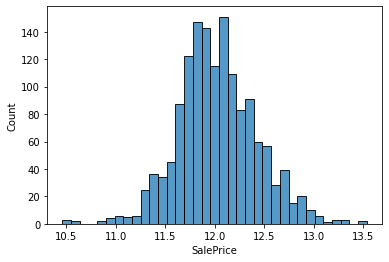

In [17]:
sns.histplot(data=train, x="SalePrice")

In [18]:
train.corrwith(train['SalePrice']).sort_values()

EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
MSSubClass      -0.073959
LowQualFinSF    -0.037963
YrSold          -0.037263
OverallCond     -0.036868
MiscVal         -0.020021
Id              -0.017942
BsmtHalfBath    -0.005149
BsmtFinSF2       0.004832
3SsnPorch        0.054900
MoSold           0.057330
PoolArea         0.069798
ScreenPorch      0.121208
BedroomAbvGr     0.209043
BsmtUnfSF        0.221985
BsmtFullBath     0.236224
LotArea          0.257320
HalfBath         0.313982
2ndFlrSF         0.319300
OpenPorchSF      0.321053
WoodDeckSF       0.334135
LotFrontage      0.355879
BsmtFinSF1       0.372023
MasVnrArea       0.430809
Fireplaces       0.489450
TotRmsAbvGrd     0.534422
GarageYrBlt      0.541073
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
1stFlrSF         0.596981
TotalBsmtSF      0.612134
GarageArea       0.650888
GarageCars       0.680625
GrLivArea        0.700927
OverallQual      0.817185
SalePrice        1.000000
dtype: float

In [19]:
data = data.drop(["PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath",
                  "MiscVal", "LowQualFinSF", "YrSold", "OverallCond", "MSSubClass"],
                 axis = 1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('x', 0) to ('y', 1458)
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   LotShape       2919 non-null   object 
 4   LotConfig      2919 non-null   object 
 5   Neighborhood   2919 non-null   object 
 6   BldgType       2919 non-null   object 
 7   HouseStyle     2919 non-null   object 
 8   OverallQual    2919 non-null   int64  
 9   YearBuilt      2919 non-null   int64  
 10  YearRemodAdd   2919 non-null   int64  
 11  RoofStyle      2919 non-null   object 
 12  Exterior1st    2919 non-null   object 
 13  Exterior2nd    2919 non-null   object 
 14  MasVnrType     2919 non-null   object 
 15  MasVnrArea     2919 non-null   float64
 16  ExterQual      2919 non-null   object 
 17  Foundation     2919 non-null   object 

In [21]:
data.describe()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,10168.114080,6.089072,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,1159.581706,...,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,16.062350,12.064926
std,842.787043,7886.996359,1.409947,30.291442,20.894344,178.626089,455.532750,439.468337,440.690726,392.362079,...,1.569379,0.646129,24.867762,0.761494,215.357904,126.526589,67.575493,64.244246,56.184365,0.285398
min,1.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,730.500000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,12.001512
50%,1460.000000,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,1082.000000,...,6.000000,1.000000,1978.113406,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,12.105822
75%,2189.500000,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,12.105822
max,2919.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,5095.000000,...,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,576.000000,13.534474


In [22]:
def mod_outliers(data):
    df1 = data.copy()
    data = data[["LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF",
                "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF",
                "OpenPorchSF"]]
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for col in data.columns:
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
                
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        df1[col] = data[col]
        
    return(df1)


In [23]:
data = mod_outliers(data)

C:\Users\nitin\AppData\Local\Temp/ipykernel_14248/709596717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound[col]
C:\Users\nitin\AppData\Local\Temp/ipykernel_14248/709596717.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound[col]


In [24]:
data.describe()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,9576.512847,6.089072,1971.312778,1984.264474,88.632110,438.270957,557.943224,1045.432606,1153.230558,...,6.451524,0.597122,1978.113406,1.766621,470.607699,91.034601,43.482357,23.098321,16.062350,12.064926
std,842.787043,3611.992836,1.409947,30.291442,20.894344,133.072165,437.897090,431.222477,407.894107,365.015803,...,1.569379,0.646129,24.867762,0.761494,208.667506,115.912773,53.498230,64.244246,56.184365,0.285398
min,1.000000,1340.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,29.500000,334.000000,...,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,730.500000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,12.001512
50%,1460.000000,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,1082.000000,...,6.000000,1.000000,1978.113406,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,12.105822
75%,2189.500000,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,12.105822
max,2919.000000,17708.000000,10.000000,2010.000000,2010.000000,408.750000,1832.500000,1682.500000,2065.500000,2154.000000,...,15.000000,4.000000,2207.000000,5.000000,960.000000,420.000000,175.000000,1012.000000,576.000000,13.534474


In [25]:
data2 = data.copy()
data = pd.get_dummies(data)

In [26]:
train = data.loc["x"]
test = data.loc["y"]

In [27]:
X = train
X.drop('Id', axis=1, inplace=True)
y = X.pop('SalePrice')

D:\mlsetup\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1168, 166) (1168,)
(292, 166) (292,)


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def rmse_cv(model, trainset):
    rmse = np.sqrt(-cross_val_score(model, trainset, y_train, scoring = "neg_mean_squared_error",
                                    cv = 5))
    return(rmse)

In [30]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor().fit(X_train, y_train)
rmse_cv(RFR, X_train).mean()

0.15257891023666775

In [31]:


y_pred = RFR.predict(X_test)
mean_squared_error(y_test, y_pred)


0.018853044907661935

In [33]:
from xgboost.sklearn import XGBRegressor

XGBR = XGBRegressor(n_estimators = 360, max_depth = 2, learning_rate = 0.1)
XGBR.fit(X_train, y_train)
rmse_cv(XGBR, X_train).mean()

0.1390584006208494

In [34]:
y_pred = XGBR.predict(X_test)
mean_squared_error(y_test, y_pred)

0.01831671222988924

In [35]:
X_train2 = X_train.copy()

In [36]:
X_train2

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1302,10120,8,1994,1994,391.0,740.0,425.0,1165.0,1203,1323,...,0,0,1,0,0,0,0,0,1,0
1157,5001,7,2007,2008,166.0,904.0,410.0,1314.0,1314,0,...,0,0,1,0,0,0,0,0,1,0
190,10570,8,1932,1994,0.0,297.0,556.0,853.0,1549,1178,...,1,0,0,1,0,0,0,0,1,0
336,14157,9,2005,2006,200.0,1249.0,673.0,1922.0,1922,0,...,0,1,0,0,0,0,0,0,1,0
1402,6762,7,2006,2006,0.0,0.0,1286.0,1286.0,1294,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,5664,8,2000,2000,0.0,1158.0,343.0,1501.0,1659,0,...,0,1,0,0,0,0,0,0,1,0
1319,10215,4,1954,1954,132.0,492.0,372.0,864.0,948,0,...,0,0,0,1,0,0,0,0,1,0
712,4671,8,1988,1989,0.0,767.0,461.0,1228.0,1228,0,...,0,1,0,0,0,0,0,0,1,0
1257,4060,5,1922,1950,0.0,0.0,864.0,864.0,864,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
num_cols = []
for col in X_train2.columns:
    if len(X_train2[col].value_counts())> 2:
        num_cols.append(col)

In [38]:
normalized_df=(X_train2[num_cols]-X_train2[num_cols].mean())/X_train2[num_cols].std()

In [39]:
normalized_df

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
1302,0.135313,1.389657,0.762879,0.453370,2.300958,0.710557,-0.314808,0.297361,0.128789,2.214041,...,-0.223339,0.902867,0.618351,0.660496,1.621004,1.796963,1.908450,0.654997,-0.362707,-0.279358
1157,-1.295062,0.667950,1.192950,1.127509,0.586856,1.092403,-0.349354,0.667020,0.436029,-0.793792,...,-0.223339,-0.333415,0.618351,1.242689,0.305276,0.754019,0.717150,0.356176,-0.362707,-0.279358
190,0.261054,1.389657,-1.288232,0.453370,-0.677771,-0.320894,-0.013107,-0.476691,1.086493,1.884384,...,-0.223339,2.139149,2.174890,-1.917787,0.305276,-0.135832,-0.778496,0.580292,-0.362707,-0.279358
336,1.263350,2.111364,1.126785,1.031203,0.845875,1.895677,0.256352,2.175429,2.118930,-0.793792,...,-0.223339,0.902867,0.618351,1.117933,1.621004,0.993226,0.769324,0.150737,-0.362707,-0.279358
1402,-0.802995,0.667950,1.159868,1.031203,-0.677771,-1.012408,1.668131,0.597554,0.380671,-0.793792,...,-0.223339,-0.333415,0.618351,1.159518,0.305276,0.926248,0.682368,0.225442,-0.362707,-0.279358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,-1.109803,1.389657,0.961373,0.742286,-0.677771,1.683799,-0.503660,1.130955,1.390965,-0.793792,...,-0.223339,-0.951556,0.618351,0.910007,0.305276,0.146433,1.064975,0.300148,-0.362707,-0.279358
1319,0.161858,-1.497172,-0.560419,-1.472741,0.327836,0.133130,-0.436871,-0.449401,-0.577033,-0.793792,...,-0.223339,-0.951556,-0.938188,-1.002913,-1.010452,-1.054388,-0.778496,-0.801753,-0.362707,-0.279358
712,-1.387272,1.389657,0.564384,0.212606,-0.677771,0.773421,-0.231898,0.453660,0.197987,-0.793792,...,-0.223339,-0.951556,0.618351,0.410985,0.305276,0.017261,0.682368,1.439400,-0.362707,-0.279358
1257,-1.558000,-0.775465,-1.619056,-1.665352,-0.677771,-1.012408,0.696238,-0.449401,-0.809539,-0.793792,...,-0.223339,-1.569697,-0.938188,-0.000151,-2.326180,-2.240856,-0.778496,0.991170,-0.362707,-0.279358


In [40]:
X_train2[num_cols] = normalized_df

In [41]:
X_train2.dropna()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1302,0.135313,1.389657,0.762879,0.453370,2.300958,0.710557,-0.314808,0.297361,0.128789,2.214041,...,0,0,1,0,0,0,0,0,1,0
1157,-1.295062,0.667950,1.192950,1.127509,0.586856,1.092403,-0.349354,0.667020,0.436029,-0.793792,...,0,0,1,0,0,0,0,0,1,0
190,0.261054,1.389657,-1.288232,0.453370,-0.677771,-0.320894,-0.013107,-0.476691,1.086493,1.884384,...,1,0,0,1,0,0,0,0,1,0
336,1.263350,2.111364,1.126785,1.031203,0.845875,1.895677,0.256352,2.175429,2.118930,-0.793792,...,0,1,0,0,0,0,0,0,1,0
1402,-0.802995,0.667950,1.159868,1.031203,-0.677771,-1.012408,1.668131,0.597554,0.380671,-0.793792,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,-1.109803,1.389657,0.961373,0.742286,-0.677771,1.683799,-0.503660,1.130955,1.390965,-0.793792,...,0,1,0,0,0,0,0,0,1,0
1319,0.161858,-1.497172,-0.560419,-1.472741,0.327836,0.133130,-0.436871,-0.449401,-0.577033,-0.793792,...,0,0,0,1,0,0,0,0,1,0
712,-1.387272,1.389657,0.564384,0.212606,-0.677771,0.773421,-0.231898,0.453660,0.197987,-0.793792,...,0,1,0,0,0,0,0,0,1,0
1257,-1.558000,-0.775465,-1.619056,-1.665352,-0.677771,-1.012408,0.696238,-0.449401,-0.809539,-0.793792,...,0,0,0,1,0,0,0,0,1,0


In [42]:
RFR = RandomForestRegressor().fit(X_train2, y_train)
rmse_cv(RFR, X_train2).mean()

0.15212400949111746

In [43]:
XGBR = XGBRegressor(n_estimators = 360, max_depth = 2, learning_rate = 0.1)
XGBR.fit(X_train2, y_train)
rmse_cv(XGBR, X_train2).mean()

0.13905836565352644